# **Axur Technical Assesment: AI internship**
---
## Captioning com Microsoft Florence-2-large  
Este notebook faz scraping de uma página, baixa uma imagem, envia para o modelo vision-enabled e submete o resultado.



### Libraries

In [35]:
from bs4 import BeautifulSoup
import requests
import base64
from PIL import Image
from io import BytesIO

### Definitions

In [ ]:
SCRAPE_URL = "https://intern.aiaxuropenings.com/scrape/7829af04-97a6-4776-aae5-0c5164807c9c"
MODEL_URL = "https://intern.aiaxuropenings.com/v1/chat/completions"
SUBMIT_URL = "https://intern.aiaxuropenings.com/api/submit-response"

API_TOKEN = "jFSzWm3MJsP7vWbVtAi3X6TeJhKTAZmP"
MODEL_ID = "microsoft-florence-2-large"

HEADERS = {
    "Authorization": f"Bearer {API_TOKEN}",
    "Content-Type": "application/json"
}

### Scraping

In [ ]:
page = requests.get(SCRAPE_URL)
page.raise_for_status()

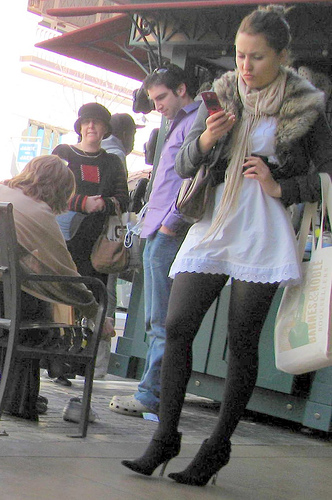

/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCAH0AUwDAREAAhEBAxEB/8QAHwAAAgICAwEBAQAAAAAAAAAABwgGCQQFAgMKAAsB/8QASxAAAgEDAwMCBAQEBAMGBAILAQIDBAURBhIhAAcxE0EIIlFhFDJxgQkVI5EWQlKhM2KxFyTB0eHwQ3KC8RglNFOSJ3OiKDVUg8L/xAAcAQABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xABHEQABAwMDAgQEAwcDAQYEBwEBAAIDBBEhBRIxBkETIlFhMnGBkQcUoRUjQrHB0fAzUuHxFiRDYnKSFzSCwiVjg5Oio9Li/9oADAMBAAIRAxEAPwD38dJJfdJJfxvB/TpJKtz4+7fdL/R6Ls1ppGuksVPXzSUyYZj6oWJZCuRlVw306o+odRZBSO3GxXqP4awG8sl7YAVZncHQNOtrg09c6SaxahrKyOeS3SKA9OslRK6fMh2tmKSLO04yPfb15dR66+WMskYQF6xFQeUua/cM5Cye4Udpp66np6a30NNLUSTTPsiUERtKy7jgDnCAAZ8nq40OQtjLifkqzUdQnc0DxDtAWr0VSrVXvS0SoYyJjUGMj2hRiR98EJk/X9ei62Vm3BWfAk3YJK3/AHIWZ7xbYoIXM8UHoxjYxw0ikktt54+U/sOpqPcKezDlFTwyubdrSh9LS1FFCwpaConhamRIo3HLSb285+u/cT9Afp0VG+w87rFUg02pnNo2kZ5sVhVCSRU1TTSGISGowjMV/q71Vi5GfGWbP02nooyxFuEW7pCrkeBtP2WoqGWOlo5U

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
img_tag = soup.find("img")



if img_tag:
    img_content = img_tag["src"]
else:
    print("[ERROR] Imagem não encontrada")

img_data = img_content.split(',')[1]



# Display Image
img_bytes = base64.b64decode(img_data)
img = Image.open(BytesIO(img_bytes))

display(img)

### Getting Image Description

In [ ]:
payload = {
    "model": MODEL_ID,
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": "<DETAILED_CAPTION>"
                },
                {
                    "type": "image_url", 
                    "image_url": {"url": img_content}
                }
            ]
        }
    ],
    "max_tokens": 256,
    "temperature": 0.7
}


model_input = requests.post(MODEL_URL, json=payload, headers=HEADERS)
model_input.raise_for_status()
model_output = model_input.json()

{'choices': [{'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': 'The image depicts a scene at what appears to be a street or outdoor establishment. The main focus is on a young woman standing and looking at her phone. She is dressed in a white dress with a fringed hem, black stockings, and black high-heeled shoes. She is wearing a scarf and appears to be in mid-stride, slightly lifting her leg. Behind her, there are several people waiting or engaging in activities. One person is looking at her phone, another is holding a bag, and there are others standing nearby. The setting includes a bench and a large structure, with a concerned or attentive expression on their faces. The scene suggests a bustling environment, possibly during a busy day.', 'reasoning_content': None, 'role': 'assistant', 'tool_calls': []}, 'stop_reason': None}], 'created': 1747437034, 'id': 'chatcmpl-126dcc194bb645469edaa45c292cbe94', 'model': 'microsoft-florence-2-large', 'object': 'chat.c

In [51]:
description = model_output["choices"][0]["message"]["content"]

In [52]:
print(description)

The image depicts a scene at what appears to be a street or outdoor establishment. The main focus is on a young woman standing and looking at her phone. She is dressed in a white dress with a fringed hem, black stockings, and black high-heeled shoes. She is wearing a scarf and appears to be in mid-stride, slightly lifting her leg. Behind her, there are several people waiting or engaging in activities. One person is looking at her phone, another is holding a bag, and there are others standing nearby. The setting includes a bench and a large structure, with a concerned or attentive expression on their faces. The scene suggests a bustling environment, possibly during a busy day.


In [ ]:
def get_description(data):
    
    payload = {
        "model": MODEL_ID,
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text", 
                        "text": "<DETAILED_CAPTION>"
                    },
                    {
                        "type": "image_url", 
                        "image_url": {"url": data}
                    }
                ]
            }
        ],
        "max_tokens": 256,
        "temperature": 0.7
    }

    model_input = requests.post(MODEL_URL, json=payload, headers=HEADERS)
    model_input.raise_for_status()
    model_output = model_input.json()

    description = model_output["choices"][0]["message"]["content"]

    return description
    

In [ ]:
def get_html(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return resp.text

def extract_data(html):
    soup = BeautifulSoup(html, 'html.parser')
    img = soup.find("img")
    if not img or not img.get("src"):
        raise RuntimeError("Imagem não encontrada na página")
    return img["src"]

def decode_data(data_url):
    _, b64 = data_url.split(",", 1)
    return base64.b64decode(b64)

def display_image_bytes(img_bytes):
    img = Image.open(BytesIO(img_bytes))
    display(img)

def build_model_payload(data_url, prompt="<DETAILED_CAPTION>", model="microsoft-florence-2-large", max_tokens=256, temperature=0.7):
    return {
        "model": model,
        "messages": [
            {
                "role": "user",
                "content": [
                    {"type": "text",        "text": prompt},
                    {"type": "input_image", "image_url": {"url": data_url}}
                ]
            }
        ],
        "max_tokens": max_tokens,
        "temperature": temperature
    }

def call_model_api(payload, url, headers):
    resp = requests.post(url, json=payload, headers=headers)
    resp.raise_for_status()
    return resp.json()

def submit_model_response(response_json, url, headers):
    resp = requests.post(url, json=response_json, headers=headers)
    resp.raise_for_status()
    return resp.json()
